## 1. Import libraries

In [155]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../")

In [213]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pickle

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

## 2. Import Data

In [158]:
original = pd.read_csv("../Data/ql.csv")

In [159]:
df = original.copy()

In [160]:
df.drop(['Unnamed: 0','UA_Country','UA_Name'], axis=1, inplace=True)

In [161]:
df.head()

,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [162]:
#sns.pairplot(df, hue="UA_Country")

In [163]:
pca = PCA(2)

In [164]:
df2 = pd.DataFrame(pca.fit_transform(df.drop(columns="UA_Continent")), columns=["PC1","PC2"])

In [165]:
df2.head()

,PC1,PC2
0,3.618803,-4.822298
1,2.058583,-3.204492
2,-0.273175,-1.312643
3,-6.399488,-0.450371
4,7.417597,3.178963


In [166]:
completo = df2.copy()
completo["Cont"] = df["UA_Continent"]

In [167]:
completo.head()

,PC1,PC2,Cont
0,3.618803,-4.822298,Europe
1,2.058583,-3.204492,Oceania
2,-0.273175,-1.312643,North America
3,-6.399488,-0.450371,Asia
4,7.417597,3.178963,Europe


/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


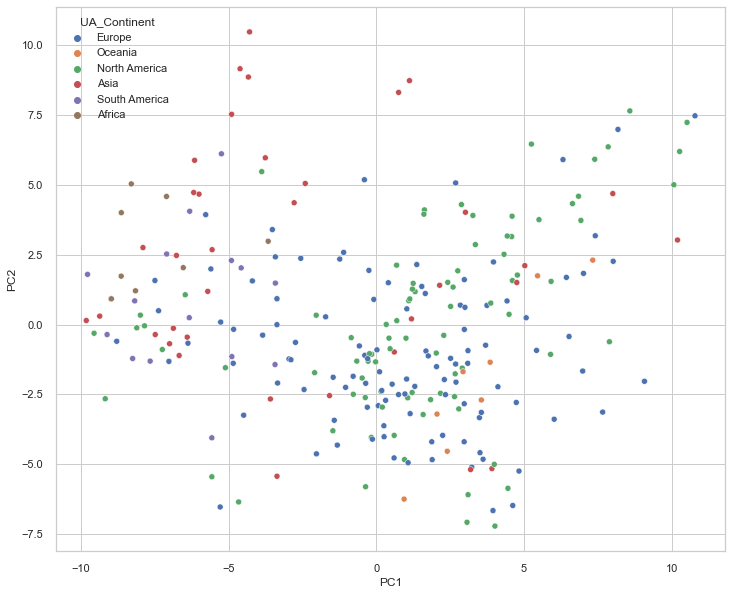

In [168]:
pca_country = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df["UA_Continent"]);

In [169]:
dat_ = df.copy()
dat_.drop(columns="UA_Continent", inplace=True)
dat_.head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [170]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(dat_), columns=dat_.columns)
df_scaler.head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,-0.146614,-0.708676,-0.822926,-0.074752,0.042647,1.105105,1.239273,1.517121,1.289800,0.693246,0.708052,-0.113343,0.068068,1.695288,-1.259644,1.711231,-0.228377
1,-0.068891,-0.431500,-0.678891,-0.024529,-0.800149,0.463413,0.982639,0.547433,0.770793,0.591610,1.025821,0.667848,-0.216230,-0.462360,-0.689749,0.597910,0.653434
2,0.347018,0.128172,-0.383144,-0.474573,-0.953908,0.278898,0.636554,-3.228355,-0.247839,0.143412,0.565278,0.961703,-0.360009,0.102203,-0.409420,0.136955,-0.615153
3,1.229051,1.468602,-0.994418,-1.060375,0.548469,0.815341,-0.837234,0.193516,-1.521805,-0.702730,-1.011729,0.139240,2.115962,-1.240976,-1.384457,-0.147112,0.633922
4,-1.490840,-0.786874,1.571212,1.335804,2.336327,0.977984,0.715238,0.878693,0.750961,1.061538,0.691771,-0.003395,0.001070,-0.364966,1.579597,0.915089,0.512445


## We performed the elbow method to determine the number of clusters to use

In [171]:
kmeans = [KMeans(n_clusters=i) for i in range(1,31)]
for model in kmeans:
    model.fit(df2)

In [172]:
inertias = [model.inertia_ for model in kmeans]
inertias[:8]

[9017.471078190772,
 4723.562794605688,
 2947.990459386898,
 2396.4457902353397,
 1961.58369188188,
 1568.9271217211424,
 1371.6860240055012,
 1186.9261603544414]

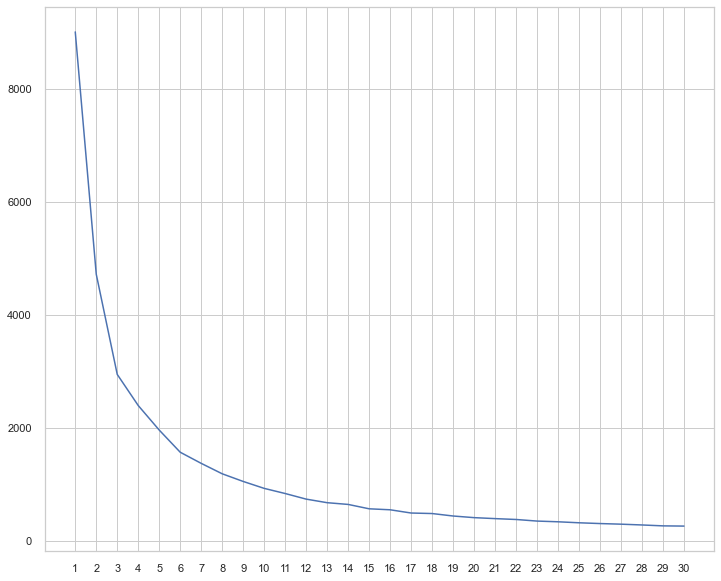

In [173]:
plt.plot(range(1,31),inertias)
plt.xticks(range(1,31));

## We train the algorithm

In [174]:
km = KMeans(n_clusters=3)
km.fit(df2)

KMeans(n_clusters=3)

In [175]:
y_pred = km.predict(df2)

In [176]:
df2["predict"] = y_pred

In [177]:
df2["real"] = original["UA_Continent"]

In [178]:
df2

,PC1,PC2,predict,real
0,3.618803,-4.822298,0,Europe
1,2.058583,-3.204492,0,Oceania
2,-0.273175,-1.312643,0,North America
3,-6.399488,-0.450371,1,Asia
4,7.417597,3.178963,2,Europe
...,...,...,...,...
261,-0.775652,-2.496534,0,North America
262,-3.361690,0.925456,1,Europe
263,-6.868842,-0.132189,1,Asia
264,-2.887486,-1.259443,1,Europe


In [179]:
crosstab = pd.crosstab(df2.predict, df2.real)

In [180]:
crosstab

real,Africa,Asia,Europe,North America,Oceania,South America
predict,,,,,,
0,0,6,65,46,6,0
1,8,23,25,11,0,15
2,0,8,21,30,2,0


## We inspect the existing correlation with our precondition

In [181]:
df['predict'] = y_pred

In [182]:
corr = df.corr()
corr

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,predict
Housing,1.000000,0.794576,-0.344616,-0.462969,-0.233817,0.176004,-0.434984,0.011744,-0.166979,-0.549433,-0.417733,-0.490245,-0.006933,-0.301744,-0.008200,-0.231671,-0.165504,-0.181372
Cost of Living,0.794576,1.000000,0.024625,-0.132262,-0.134216,0.258755,-0.423645,-0.080333,-0.291351,-0.430197,-0.467667,-0.327045,0.050611,-0.259348,0.184746,-0.336006,-0.030579,0.104886
Startups,-0.344616,0.024625,1.000000,0.796214,0.276168,0.074896,0.215702,-0.209409,-0.094998,0.376239,0.009754,0.342311,-0.025140,0.193212,0.446968,-0.142096,0.253849,0.605149
Venture Capital,-0.462969,-0.132262,0.796214,1.000000,0.368431,0.097133,0.250429,-0.119737,0.032858,0.524150,0.103033,0.373194,-0.101222,0.266309,0.332004,-0.094176,0.269301,0.583260
Travel Connectivity,-0.233817,-0.134216,0.276168,0.368431,1.000000,0.335116,0.262558,0.260882,0.420599,0.467939,0.108372,0.038983,-0.163445,0.233239,0.312039,0.018287,0.137784,0.243232
Commute,0.176004,0.258755,0.074896,0.097133,0.335116,1.000000,0.249281,0.247376,0.378433,0.297148,0.180436,-0.016677,0.088150,0.139976,0.204701,0.178782,0.106959,0.081078
Business Freedom,-0.434984,-0.423645,0.215702,0.250429,0.262558,0.249281,1.000000,-0.039642,0.636899,0.757955,0.706070,0.633438,0.022459,0.518809,0.054772,0.362165,0.081172,-0.124107
Safety,0.011744,-0.080333,-0.209409,-0.119737,0.260882,0.247376,-0.039642,1.000000,0.283774,0.063285,0.139070,-0.241724,0.290702,-0.012387,-0.121699,0.374310,0.042888,-0.116567
Healthcare,-0.166979,-0.291351,-0.094998,0.032858,0.420599,0.378433,0.636899,0.283774,1.000000,0.605745,0.516984,0.158573,-0.078670,0.302419,0.092242,0.462240,0.038526,-0.206992
Education,-0.549433,-0.430197,0.376239,0.524150,0.467939,0.297148,0.757955,0.063285,0.605745,1.000000,0.601733,0.513191,-0.080942,0.530963,0.246393,0.290475,0.165348,0.126551


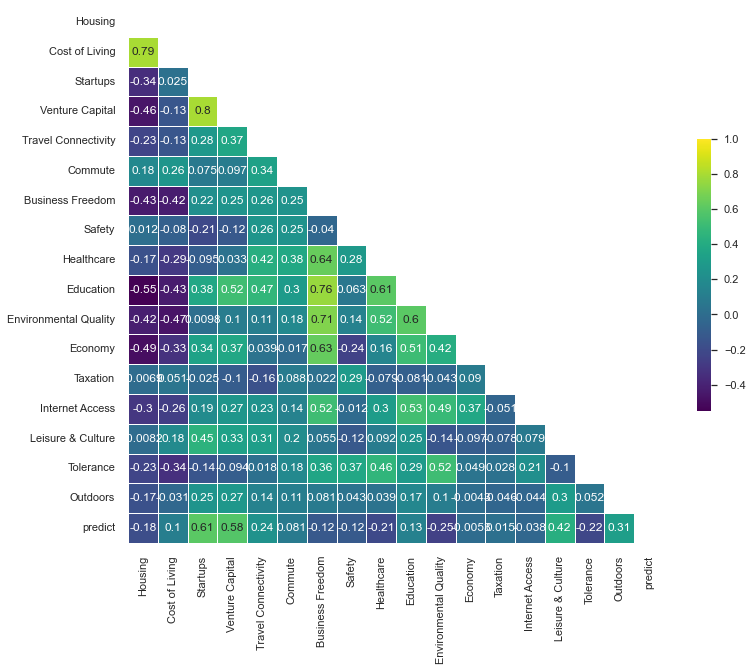

In [183]:
mascara5 = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,
            mask = mascara5,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);

### We can see that there is no strong correlation between the variables.

In [184]:
#Sacamos K-means con todos los predictores

In [185]:
km2  = KMeans(n_clusters=3)
km2.fit(df_scaler)

KMeans(n_clusters=3)

In [186]:
y_cuatro = km2.predict(df_scaler)

In [187]:
df_scaler["real"] = original.UA_Continent
df_scaler["kmeans"] = y_cuatro

In [188]:
df_scaler.head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,real,kmeans
0,-0.146614,-0.708676,-0.822926,-0.074752,0.042647,1.105105,1.239273,1.517121,1.289800,0.693246,0.708052,-0.113343,0.068068,1.695288,-1.259644,1.711231,-0.228377,Europe,0
1,-0.068891,-0.431500,-0.678891,-0.024529,-0.800149,0.463413,0.982639,0.547433,0.770793,0.591610,1.025821,0.667848,-0.216230,-0.462360,-0.689749,0.597910,0.653434,Oceania,0
2,0.347018,0.128172,-0.383144,-0.474573,-0.953908,0.278898,0.636554,-3.228355,-0.247839,0.143412,0.565278,0.961703,-0.360009,0.102203,-0.409420,0.136955,-0.615153,North America,2
3,1.229051,1.468602,-0.994418,-1.060375,0.548469,0.815341,-0.837234,0.193516,-1.521805,-0.702730,-1.011729,0.139240,2.115962,-1.240976,-1.384457,-0.147112,0.633922,Asia,1
4,-1.490840,-0.786874,1.571212,1.335804,2.336327,0.977984,0.715238,0.878693,0.750961,1.061538,0.691771,-0.003395,0.001070,-0.364966,1.579597,0.915089,0.512445,Europe,0


In [189]:
cross2 = pd.crosstab(df_scaler.kmeans, df_scaler.real)
cross2

real,Africa,Asia,Europe,North America,Oceania,South America
kmeans,,,,,,
0,0,7,83,11,6,0
1,8,24,22,11,0,15
2,0,6,6,65,2,0


/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


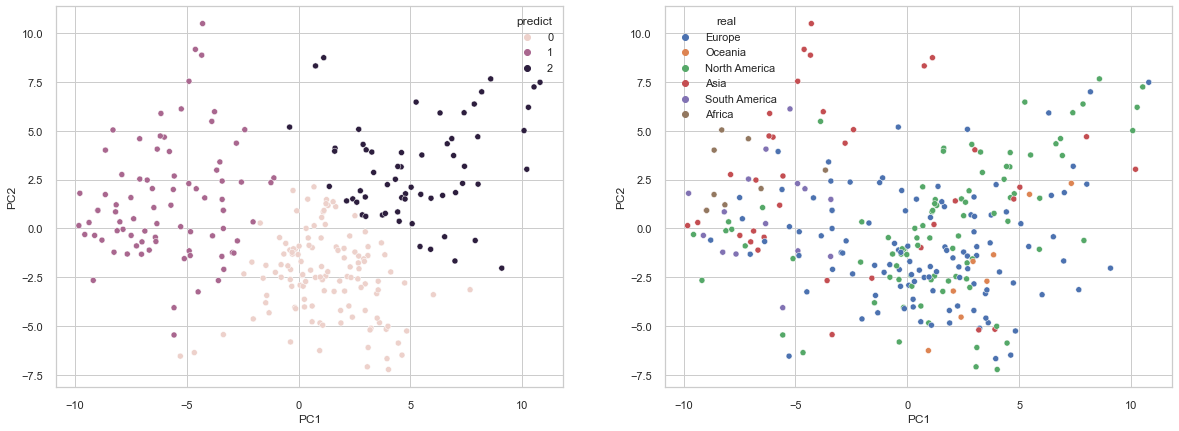

In [190]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
pca_ = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df2["predict"], ax=axs[0]);
pca_ = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df2["real"], ax=axs[1]);

In [210]:
df_silueta = df2.drop(columns=["predict","real"])

In [211]:
silhouette_score(df_silueta, y_pred)

0.43360294558127743

In [214]:
pickle.dump(df2, open("Clusters_kmeans_model", 'wb'))

## Observemos con profundidad cada una de nuestras columnas, en relación a cada cluster

### Housing

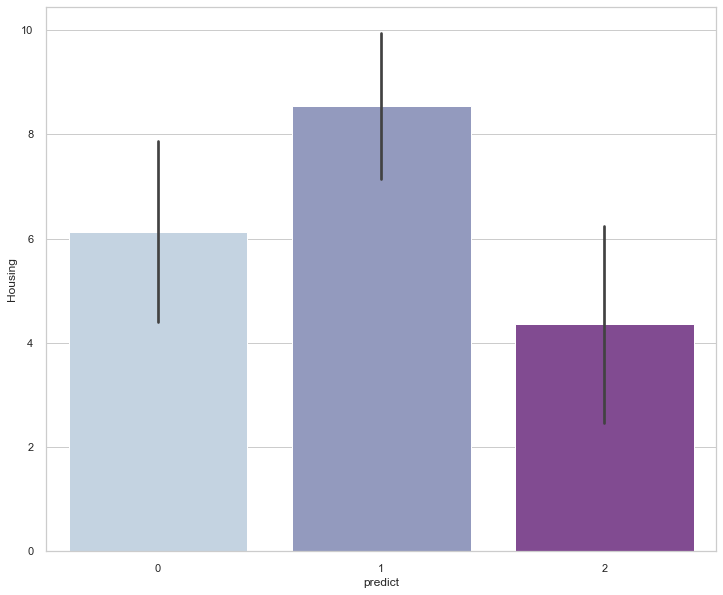

In [252]:
barplot = sns.barplot(x="predict", y="Housing", data=df,palette ="BuPu",ci="sd")

### Cost of Living

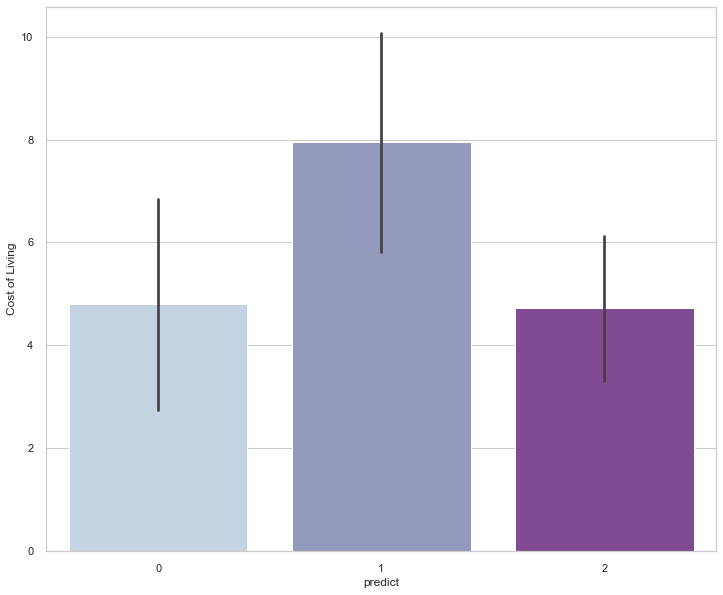

In [251]:
barplot = sns.barplot(x="predict", y="Cost of Living", data=df,palette ="BuPu",ci="sd")

### Travel Connectivity

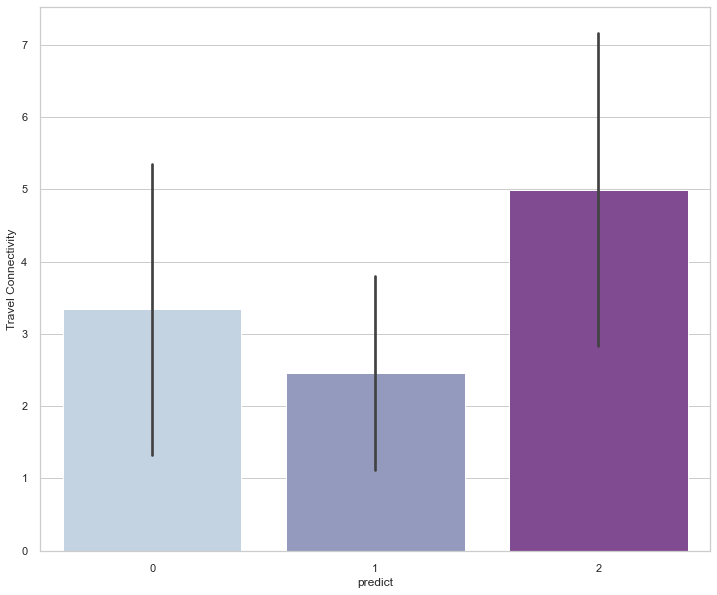

In [250]:
barplot = sns.barplot(x="predict", y="Travel Connectivity", data=df,palette ="BuPu",ci="sd")

### Safety

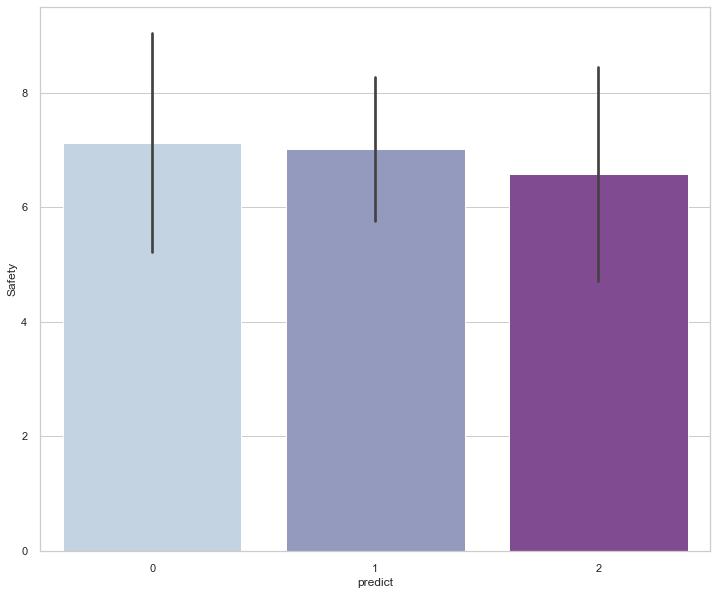

In [249]:
barplot = sns.barplot(x="predict", y="Safety", data=df,palette ="BuPu",ci="sd")

### Healthcare

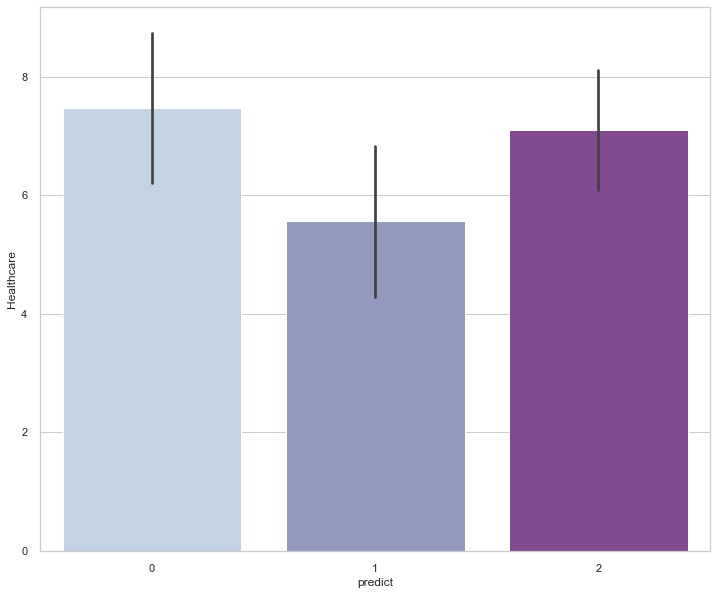

In [248]:
barplot = sns.barplot(x="predict", y="Healthcare", data=df,palette ="BuPu",ci="sd")

### Education

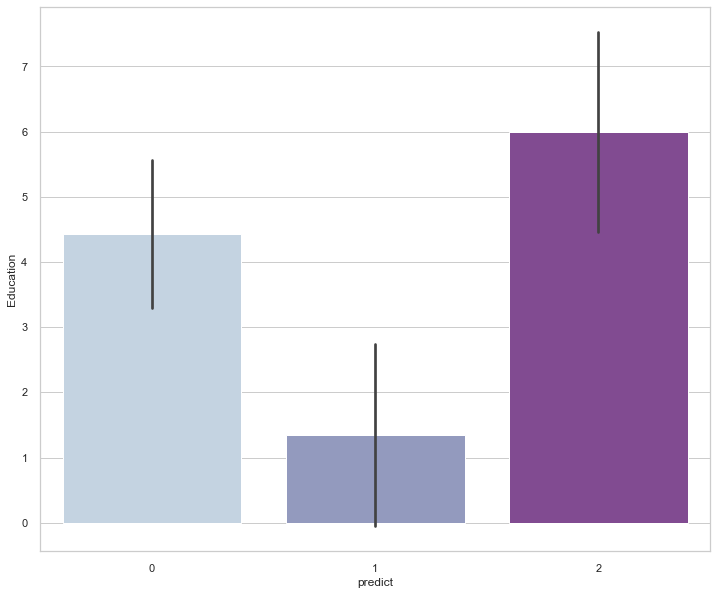

In [247]:
barplot = sns.barplot(x="predict", y="Education", data=df,palette ="BuPu",ci="sd")

### Environmental Quality

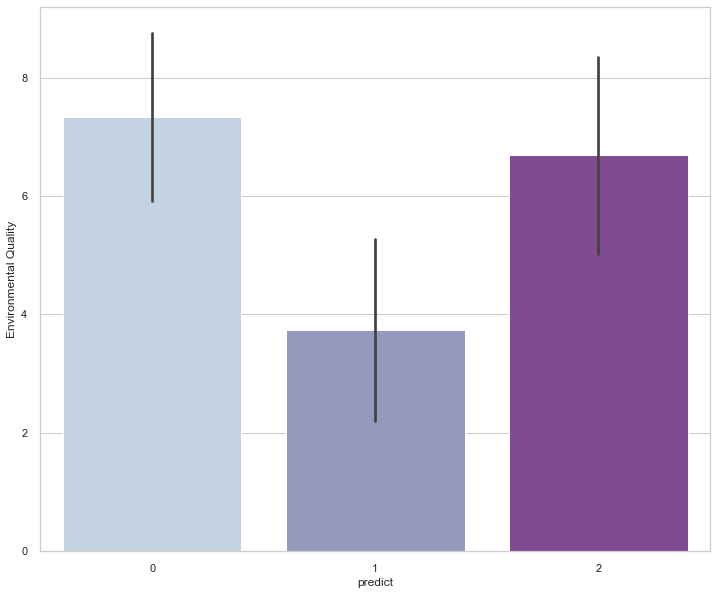

In [246]:
barplot = sns.barplot(x="predict", y="Environmental Quality", data=df,palette ="BuPu",ci="sd")

### Economy

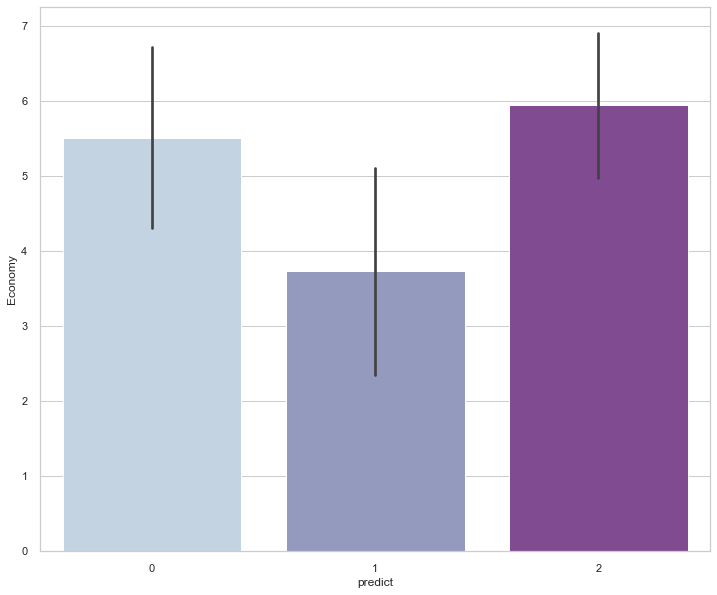

In [245]:
barplot = sns.barplot(x="predict", y="Economy", data=df,palette ="BuPu",ci="sd")

### Internet Access

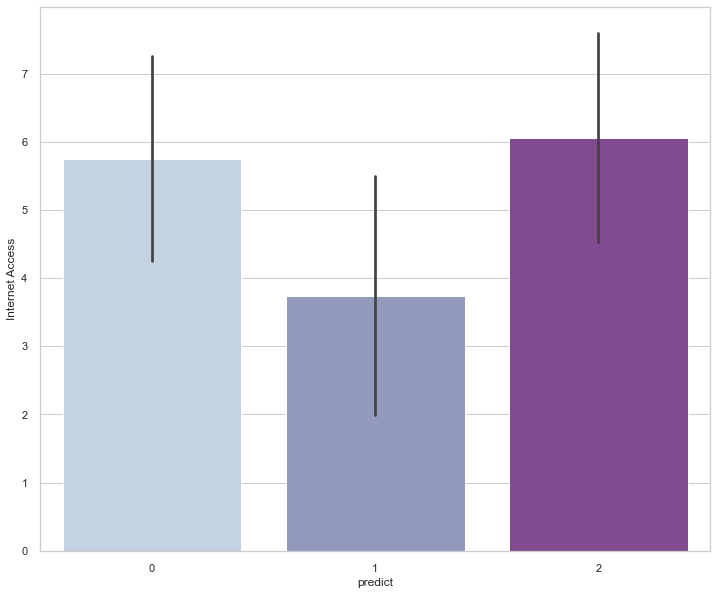

In [244]:
barplot = sns.barplot(x="predict", y="Internet Access", data=df,palette ="BuPu",ci="sd")

### Leisure & Culture

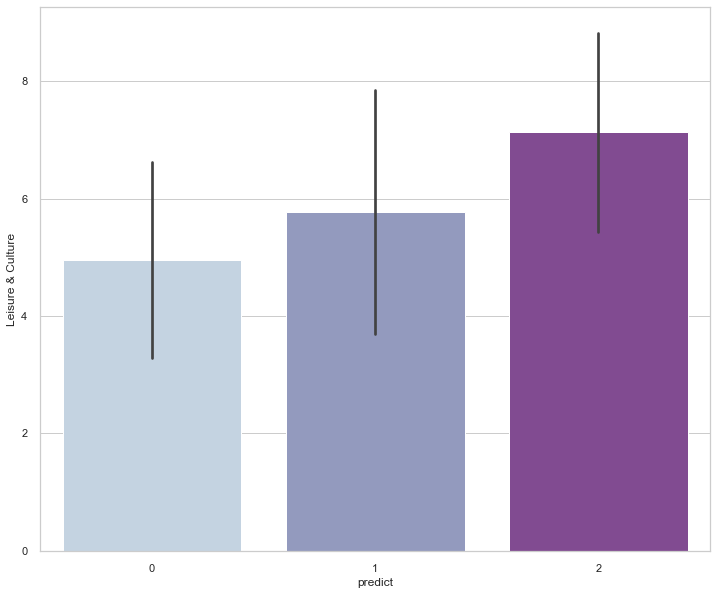

In [243]:
barplot = sns.barplot(x="predict", y="Leisure & Culture", data=df,palette ="BuPu",ci="sd")

### Tolerance

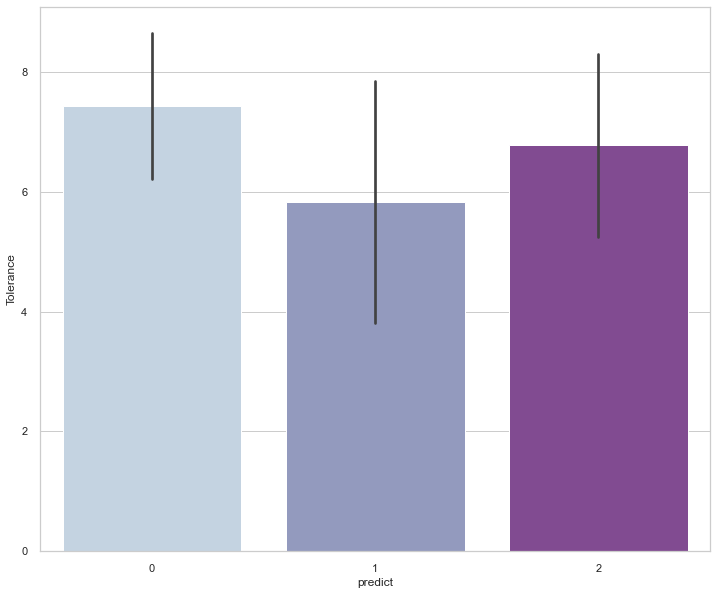

In [242]:
barplot = sns.barplot(x="predict", y="Tolerance", data=df,palette ="BuPu",ci="sd")

### Outdoors

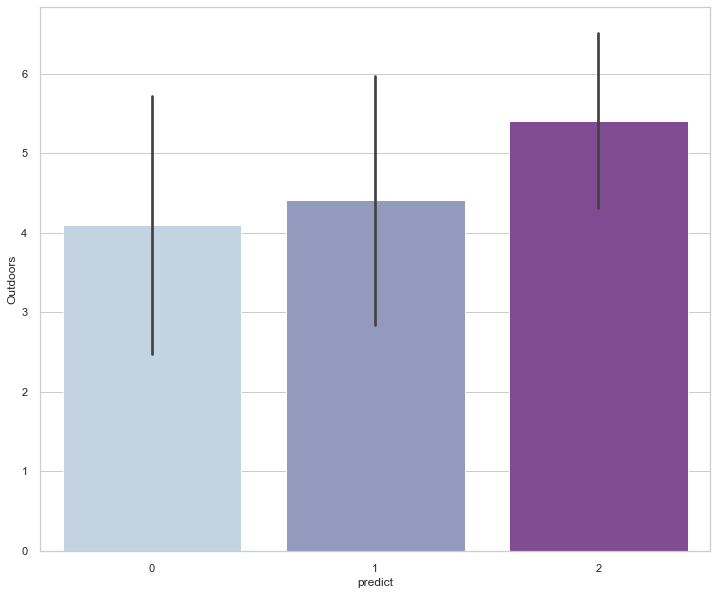

In [241]:
barplot = sns.barplot(x="predict", y="Outdoors", data=df,palette ="BuPu", ci="sd")

### Creamos subdatadrames para ver cada uno de nuestros clusters por separado

In [205]:
subdata1 = df[df["predict"] == 0]

In [206]:
subdata2 = df[df["predict"] == 1]

In [207]:
subdata3 = df[df["predict"] == 2]

### Observemos a continuación cada columna en los diversos clusters

## Housing

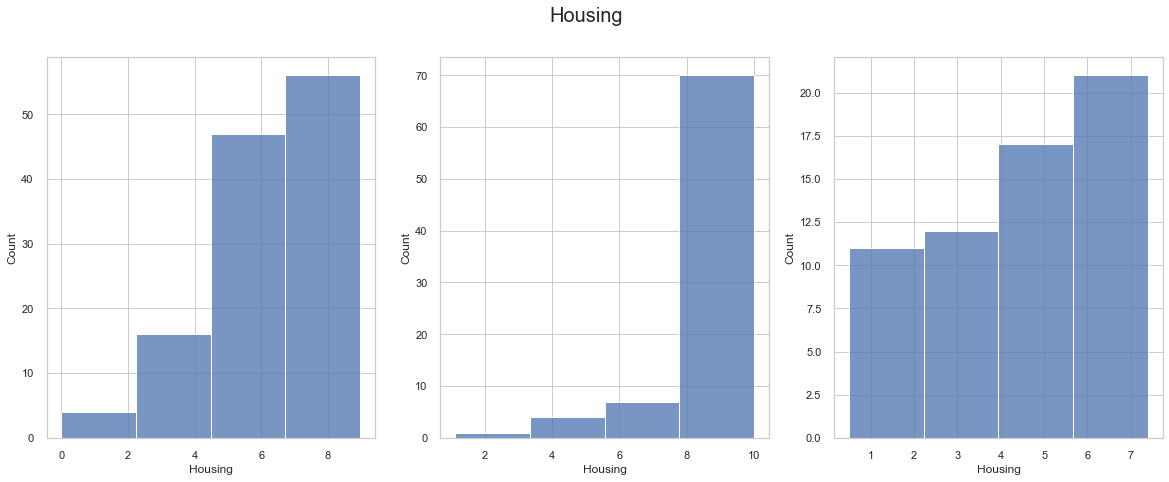

In [227]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Housing',  bins = 4, ax=axs[0])
sns.histplot(data = subdata2, x='Housing',  bins = 4, ax=axs[1])
sns.histplot(data = subdata3, x='Housing', bins = 4, ax=axs[2])
fig.suptitle('Housing', fontsize = 20);

In [217]:
print(subdata1['Housing'].mean())
print(subdata2['Housing'].mean())
print(subdata3['Housing'].mean())

6.133483739837399
8.544384146341464
4.348131147540985


## Cost of Living

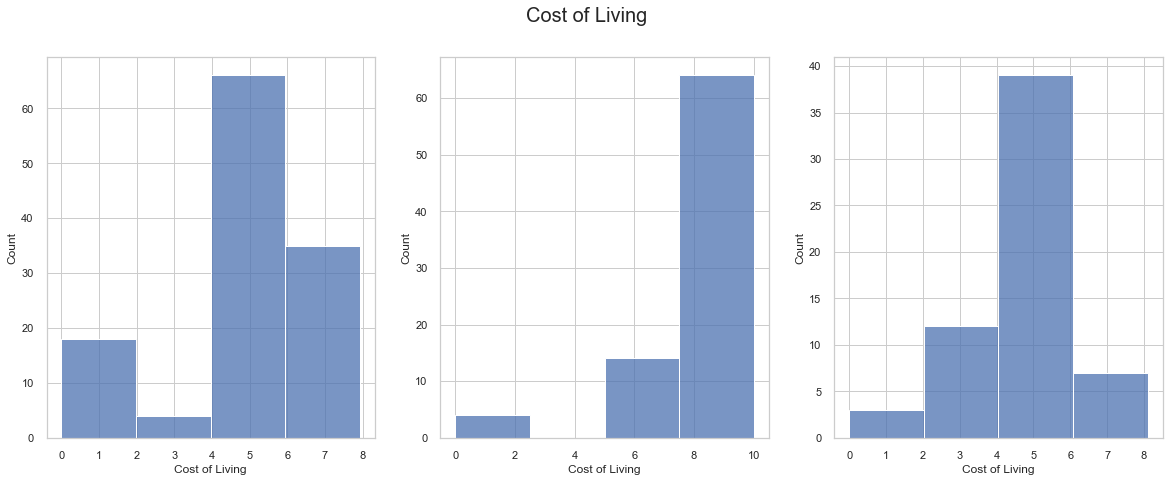

In [228]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Cost of Living',bins = 4, ax=axs[0])
sns.histplot(data = subdata2, x='Cost of Living',bins = 4, ax=axs[1])
sns.histplot(data = subdata3, x='Cost of Living', bins = 4,ax=axs[2])
fig.suptitle('Cost of Living', fontsize = 20);

In [221]:
print(subdata1['Cost of Living'].mean())
print(subdata2['Cost of Living'].mean())
print(subdata3['Cost of Living'].mean())

4.792658536585365
7.94230487804878
4.715639344262296


## Travel Connectivity

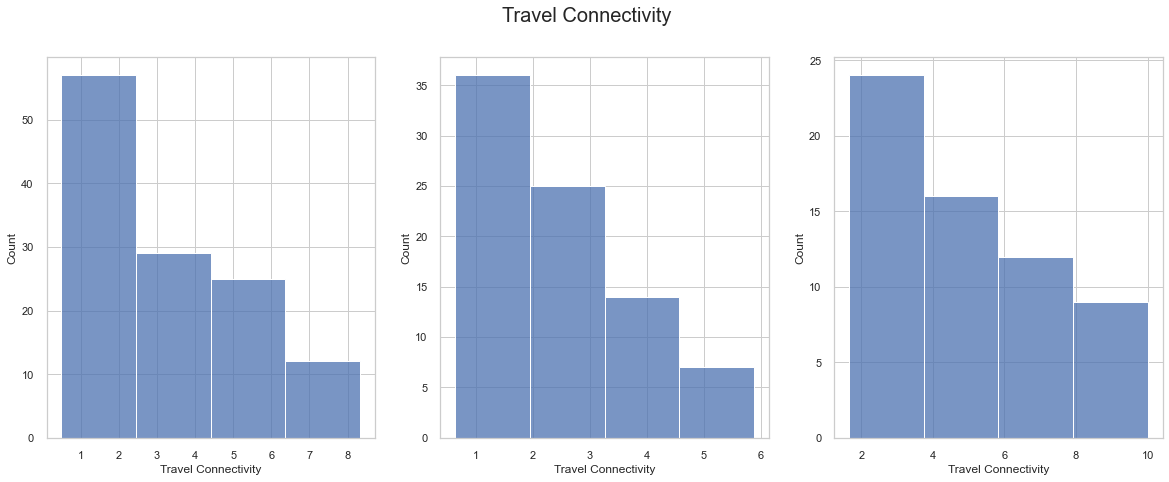

In [229]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Travel Connectivity',bins = 4, ax=axs[0])
sns.histplot(data = subdata2, x='Travel Connectivity',bins = 4, ax=axs[1])
sns.histplot(data = subdata3, x='Travel Connectivity',bins = 4, ax=axs[2])
fig.suptitle('Travel Connectivity', fontsize = 20);

In [222]:
print(subdata1['Travel Connectivity'].mean())
print(subdata2['Travel Connectivity'].mean())
print(subdata3['Travel Connectivity'].mean())

3.337463414634147
2.4603658536585367
4.994016393442623


## Safety

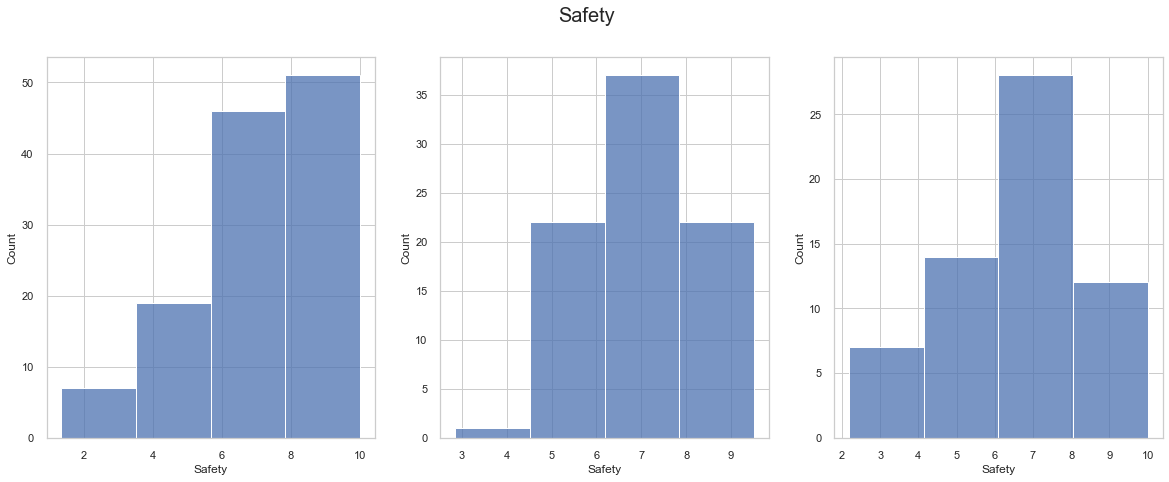

In [230]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Safety',bins = 4, ax=axs[0])
sns.histplot(data = subdata2, x='Safety',bins = 4, ax=axs[1])
sns.histplot(data = subdata3, x='Safety',bins = 4, ax=axs[2])
fig.suptitle('Safety', fontsize = 20);

In [223]:
print(subdata1['Safety'].mean())
print(subdata2['Safety'].mean())
print(subdata3['Safety'].mean())

7.130646341463415
7.020902439024391
6.584778688524591
